In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import raw_dataloader as dl
from scale_target import TargetScaler

# Analyze solution latency across subject and across difficulty level

In [2]:
SLs_all = {}

# Get list of data names
df_names = pd.read_csv('%s/Data_Matlab/data_list.csv'%(root_path))
data_names = [x[0:6] for x in df_names.values.flatten()]
data_names = [data_names[i] for i in range(11)]

# Get SL of each subject of each difficulty level
for i_data, data_name in enumerate(data_names):
    SLs_one = []
    for i_diff in range(1,4):
        X, Y_class, Y_reg, C = dl.read_data([i_diff], [i_data], pred_type='class')
        SLs_one.append(Y_reg)
    SLs_all[data_name] = SLs_one



After removing outliers, X shape:  (20, 12, 512)
Mean of all trials: 13.214258
After removing outliers, X shape:  (33, 12, 512)
Mean of all trials: 20.172467
After removing outliers, X shape:  (10, 12, 512)
Mean of all trials: 22.633984
After removing outliers, X shape:  (24, 12, 512)
Mean of all trials: 7.094401
After removing outliers, X shape:  (35, 12, 512)
Mean of all trials: 13.515290
After removing outliers, X shape:  (16, 12, 512)
Mean of all trials: 39.909912
After removing outliers, X shape:  (45, 12, 512)
Mean of all trials: 2.669184
After removing outliers, X shape:  (88, 12, 512)
Mean of all trials: 4.278409
After removing outliers, X shape:  (41, 12, 512)
Mean of all trials: 8.058975
After removing outliers, X shape:  (40, 12, 512)
Mean of all trials: 5.489746
After removing outliers, X shape:  (75, 12, 512)
Mean of all trials: 9.011146
After removing outliers, X shape:  (25, 12, 512)
Mean of all trials: 11.606250
After removing outliers, X shape:  (17, 12, 512)
Mean of a

In [3]:
# Analyze across difficulty level
mean_SLs_diff = []
for i_diff in range(3):
    SL, num_trial = 0, 0
    for data_name in data_names:
        SL += np.sum(SLs_all[data_name][i_diff])
        num_trial += len(SLs_all[data_name][i_diff])
        
    mean_SLs_diff.append(SL/num_trial)
    print('Diff %i: mean (%f), number (%i)'%(i_diff+1, mean_SLs_diff[i_diff], num_trial))

Diff 1: mean (7.237208), number (324)
Diff 2: mean (13.408426), number (544)
Diff 3: mean (21.709672), number (216)


In [4]:
# Analyze across subject
SLs_sub = []
for data_name in data_names:
    SL_diff = []
    
    for i_diff in range(3):
        SL_diff += list(SLs_all[data_name][i_diff])
        
    SL_diff = np.array(SL_diff)
    SLs_sub.append(SL_diff)
    print('Subject %s: mean (%f), number (%i), range (%.3f)'
          %(data_name, np.mean(SL_diff), len(SL_diff), np.max(SL_diff)-np.min(SL_diff)))

Subject 110411: mean (18.354229), number (63), range (80.449)
Subject 110414: mean (17.091458), number (75), range (118.094)
Subject 110714: mean (4.753053), number (174), range (52.922)
Subject 110715: mean (8.468443), number (140), range (86.258)
Subject 110721: mean (27.973294), number (49), range (97.355)
Subject 110728: mean (15.045273), number (100), range (105.582)
Subject 110729: mean (8.494434), number (113), range (80.137)
Subject 110816: mean (16.590285), number (62), range (104.926)
Subject 110822: mean (10.171725), number (156), range (76.445)
Subject 110929: mean (23.635757), number (65), range (96.734)
Subject 110930: mean (21.732624), number (87), range (90.133)


# Make sure all the channel electrodes are in the same order

In [31]:
# Get list of data names
df_names = pd.read_csv('%s/Data_Matlab/data_list.csv'%(root_path))
data_names = [x[0:6] for x in df_names.values.flatten()]
data_names = [data_names[i] for i in range(11)]

# Load channel info
channel_info = {}
for data_name in data_names:
    channel_info[data_name] = pd.read_csv('./Channel_coordinate/%s_channels.csv'%(data_name))
    
# Compare every subject with the first subject
channel_order = np.zeros((128, 11))-1
arc_length_9 = channel_info[data_names[9]]['arc_length'].values
theta_9 = channel_info[data_names[9]]['theta'].values
for i in range(len(data_names)):
    if i == 9:
        continue
    channel_info_i = channel_info[data_names[i]]
    for i_channel in range(len(channel_info_i)):
        arc_length = channel_info_i['arc_length'][i_channel]
        theta = channel_info_i['theta'][i_channel]
        channel_order[i_channel, i] = np.argmin(arc_length_9**2+arc_length**2 \
                                                - 2*arc_length*arc_length_9*np.cos((theta_9-theta)*np.pi/180))
        

In [33]:
channel_order[:,0]

array([78., 42., 78., 42., 42., 78., 78., 42., 42., 42., 42., 78., 42.,
       42., 42., 42., 41., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.,
       42., 42., 42., 42., 42., 42., 42., 42., 42., 42., 42.])

# Analyze difference of scaling target normally and quantizationally

In [7]:
def plot_scatter(data, title):
    sort_indices = np.argsort(data)
    plt.plot(range(len(data)), data[sort_indices], marker='.')
    plt.title(title)
    
    '''
    fig, axs = plt.subplots(1,2, figsize=(8,4))
    axs[0].plot(range(len(true)), true[sort_indices], 'r.', range(len(true)), pred[sort_indices], 'b.')
    axs[0].set_xlabel('Record number')
    axs[0].set_ylabel('Solution latency')
    axs[0].legend(('True', 'Pred'))
    axs[0].set_title('std error = %.3f'%(mean_squared_error(true, pred)**0.5))

    max_value = np.max(np.hstack((true, pred)))
    axs[1].scatter(true, pred, marker='.')
    axs[1].plot(range(int(max_value)), range(int(max_value)), 'r')
    axs[1].set_xlabel('True')
    axs[1].set_ylabel('Pred')
    axs[1].set_xlim([0, max_value])
    axs[1].set_ylim([0, max_value])
    axs[1].set_title('r = %.3f'%(np.corrcoef(true, pred)[0,1]))
    '''

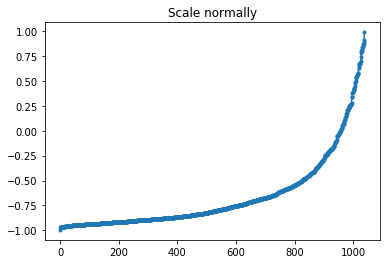

In [9]:
# Load data
with open('./raw_data/ERSP_from_raw_100_channel21.data', 'rb') as fp:
    dict_ERSP = pickle.load(fp)

SLs = dict_ERSP['SLs']

# Scale target to -1~1 normally
SLs_scale_nor = (SLs-30)/30
plot_scatter(SLs_scale_nor, 'Scale normally')

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[ 0.          1.859375    2.53203125  3.29296875  4.16484375  5.625
  7.79140625 10.53359375 15.3796875  25.275      60.        ]


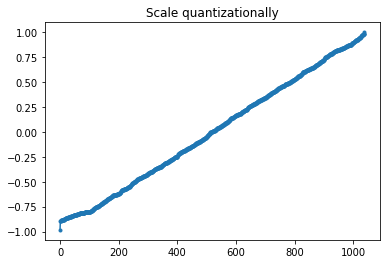

In [12]:
# Scale target to -1~1 quantizationally
scaler = TargetScaler(num_step=10)
scaler.fit(SLs)
SLs_scale_quan = scaler.transform(SLs, mode='normal')

plot_scatter(SLs_scale_quan, 'Scale quantizationally')